In [2]:
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

In [4]:
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [5]:
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [6]:
table = soup.find('table', class_='table')
rows = table.find_all('tr', class_="data-row")

In [7]:
row_data = []

for row in rows:
    data = row.find_all('td')
    temp_row = []
    for cell in data:
        info = cell.text
        temp_row.append(info)
    row_data.append(temp_row)    
    
print(row_data)
    

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

In [9]:
mars_df = pd.DataFrame(row_data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [10]:
print(mars_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [15]:
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [17]:
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

In [18]:
print(mars_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


In [23]:
months = mars_df['month'].nunique()
months

12

In [24]:
sols = mars_df['sol'].nunique()
sols

1867

In [25]:
average_temp = mars_df.groupby(['month'])['min_temp'].mean()
average_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [28]:
temp_df = pd.DataFrame(average_temp)

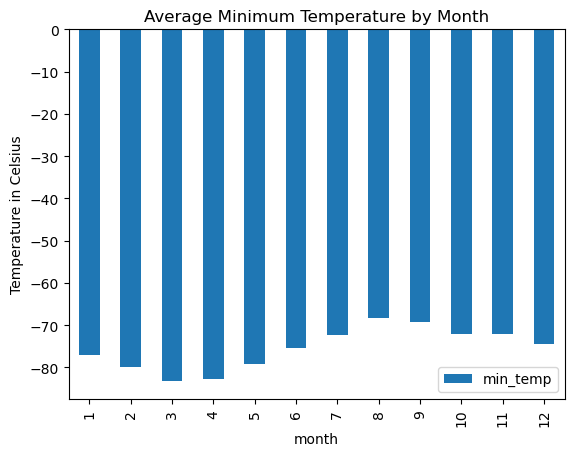

In [35]:
temp_df.plot(kind='bar', y='min_temp')

plt.title("Average Minimum Temperature by Month")
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.show()

In [38]:
sorted_temp_df = temp_df.sort_values(by='min_temp', ascending=True)

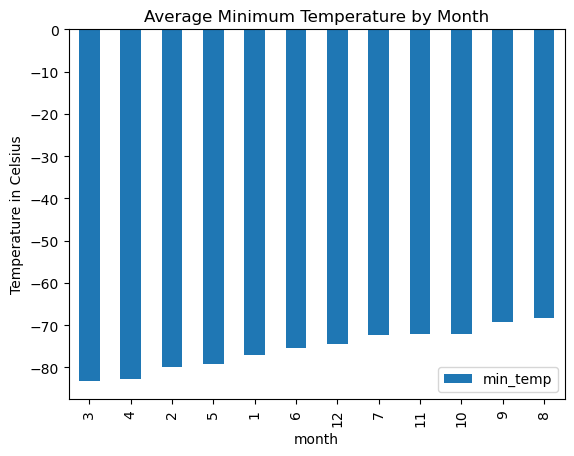

In [39]:
sorted_temp_df.plot(kind='bar', y='min_temp')

plt.title("Average Minimum Temperature by Month")
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.show()

In [40]:
average_pressure = mars_df.groupby(['month'])['pressure'].mean()
average_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [41]:
pressure_df = pd.DataFrame(average_pressure)

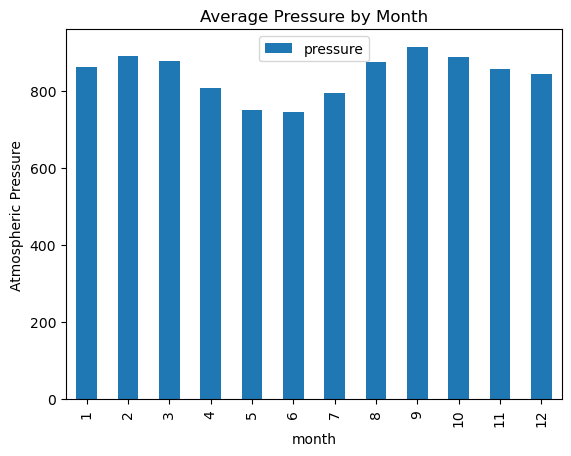

In [42]:
pressure_df.plot(kind='bar', y='pressure')

plt.title("Average Pressure by Month")
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.show()

In [44]:
sorted_pressure_df = pressure_df.sort_values(by='pressure', ascending=True)

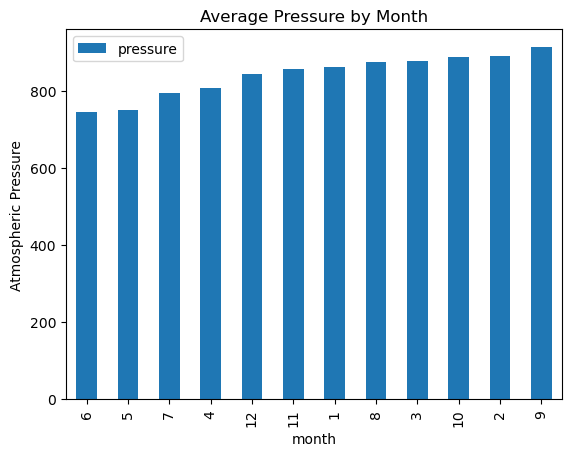

In [45]:
sorted_pressure_df.plot(kind='bar', y='pressure')

plt.title("Average Pressure by Month")
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.show()

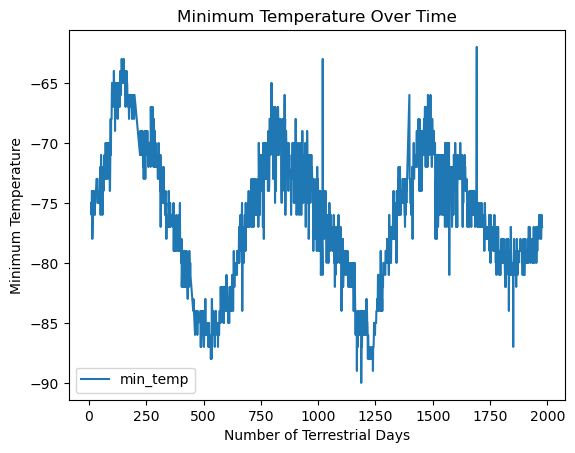

In [47]:
mars_df.plot(kind='line', x='sol', y='min_temp')

plt.title("Minimum Temperature Over Time")
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature')
plt.show()

## Minimum Temperature

### On average month 3 has the lowest temperatures.

## Atmospheric Pressure

### On average month 9 has the lowest atmospheric pressure.

## Year Length

### There are 687 terrestial days in a Martian year.

In [48]:
mars_df.to_csv('Mars.csv', index=False)

In [ ]:
browser.quit()